In [2]:
# Import liabraries
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [3]:
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.shape

(150, 4)

In [6]:
df['target'] = iris.target
df['target_name'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df.shape

(150, 6)

In [8]:
# Independent feature(X) and dependent variable (y)
X = iris.data
y = iris.target

In [9]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Create and train the SVM classifier
svm_model = SVC(kernel='rbf',C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred = svm_model.predict(X_test)

In [13]:
print('Training Accuracy : ',svm_model.score(X_train, y_train))
print('Test Accuracy : ',svm_model.score(X_test, y_test))

Training Accuracy :  0.9666666666666667
Test Accuracy :  1.0


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model,X, y, cv=5)
print('Cross validation score : ',scores)
print('Average accuracy : ',scores.mean())

Cross validation score :  [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average accuracy :  0.9666666666666666


In [15]:
# Accuracy
print('Accuracy : ',accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print("\n")
print('Classification report :\n',classification_report(y_test, y_pred))

Accuracy :  1.0


Confusion matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
# Create DataFrame for test result
test_result = pd.DataFrame(scaler.inverse_transform(X_test), columns=iris.feature_names)
test_result['actual_flower'] = iris.target_names[y_test]
test_result['predicted_flower'] = iris.target_names[y_pred]

test_result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_flower,predicted_flower
0,6.1,2.8,4.7,1.2,versicolor,versicolor
1,5.7,3.8,1.7,0.3,setosa,setosa
2,7.7,2.6,6.9,2.3,virginica,virginica
3,6.0,2.9,4.5,1.5,versicolor,versicolor
4,6.8,2.8,4.8,1.4,versicolor,versicolor
5,5.4,3.4,1.5,0.4,setosa,setosa
6,5.6,2.9,3.6,1.3,versicolor,versicolor
7,6.9,3.1,5.1,2.3,virginica,virginica
8,6.2,2.2,4.5,1.5,versicolor,versicolor
9,5.8,2.7,3.9,1.2,versicolor,versicolor


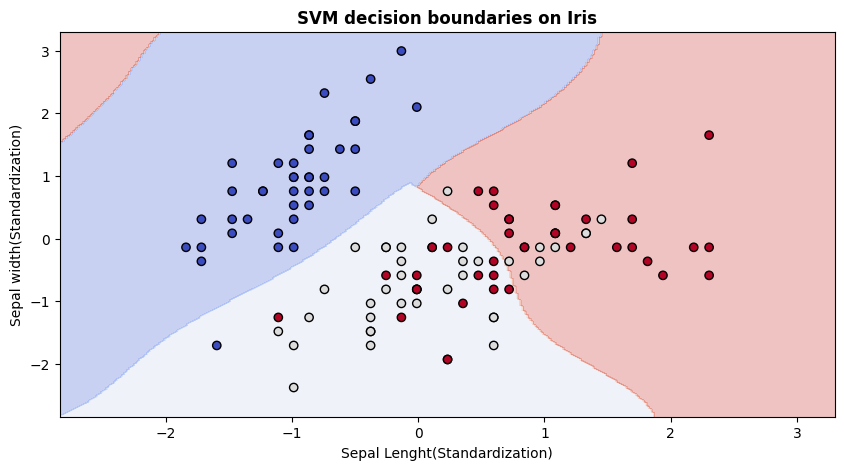

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standardize the Feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='rbf', gamma='scale', C = 1.0)
model.fit(X_train, y_train)

# mesh grid
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(x_min, x_max, 0.02))

# predict class point for each
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM decision boundaries on Iris',fontweight='bold')
plt.xlabel('Sepal Lenght(Standardization)')
plt.ylabel('Sepal width(Standardization)')
plt.show()

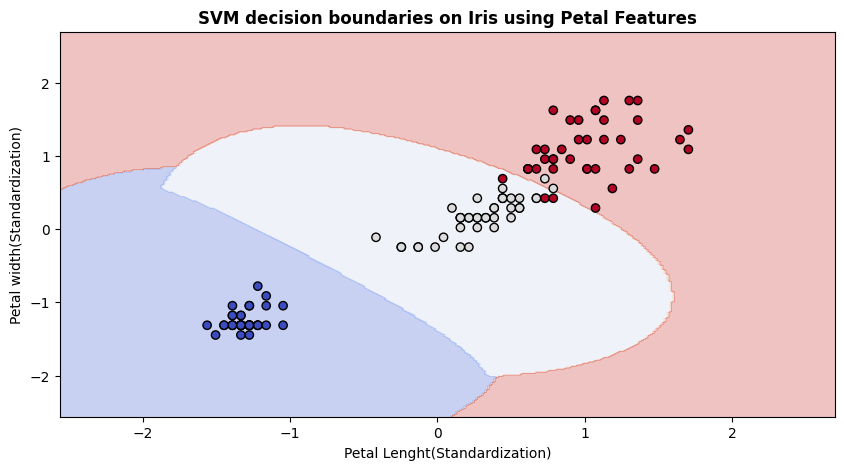

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standardize the Feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='rbf', gamma='scale', C = 1.0)
model.fit(X_train, y_train)

# mesh grid
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(x_min, x_max, 0.02))

# predict class point for each
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM decision boundaries on Iris using Petal Features',fontweight='bold')
plt.xlabel('Petal Lenght(Standardization)')
plt.ylabel('Petal width(Standardization)')
plt.show()

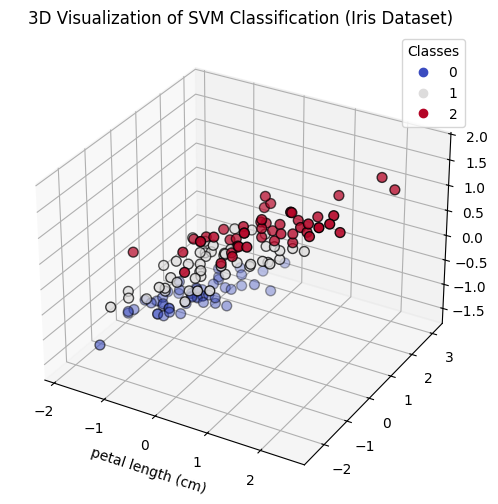

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Load the Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# StandardScaler Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an svm classifier using all 4 Features
model = SVC(kernel='rbf', C=0.5, gamma='scale')
model.fit(X_scaled, y)

# Select 3 features for visualization
x_index, y_index, z_index = 0, 1, 2

# Create 3D scatter plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
scatter = ax.scatter(X_scaled[:, x_index], X_scaled[:, y_index], X_scaled[:, z_index], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

# Set labels
ax.set_xlabel(iris.feature_names[x_index])
ax.set_xlabel(iris.feature_names[y_index])
ax.set_xlabel(iris.feature_names[z_index])

# Title and legend
plt.title('3D Visualization of SVM Classification (Iris Dataset)')
plt.legend(*scatter.legend_elements(), title='Classes', loc='upper right')
plt.show()

In [20]:
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM model
svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(X_scaled, y)

# Choose three features to visualize
x_idx, y_idx, z_idx = 0, 1, 2  # (sepal length, sepal width, petal length)

# Create 3D scatter plot
fig = go.Figure()
# Plot each class separately for color clarity
for class_value, class_name in enumerate(labels):
    fig.add_trace(go.Scatter3d(
        x=X_scaled[y == class_value, x_idx],
        y=X_scaled[y == class_value, y_idx],
        z=X_scaled[y == class_value, z_idx],
        mode='markers',
        marker=dict(size=6, opacity=0.8),
        name=class_name
    ))

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title=iris.feature_names[x_idx],
        yaxis_title=iris.feature_names[y_idx],
        zaxis_title=iris.feature_names[z_idx]
    ),
    title="🌸 Interactive 3D SVM Visualization on Iris Dataset",
    legend=dict(x=0.8, y=0.9),
)

# Display interactive 3D plot
fig.show()

✅ Model accuracy on test data: 100.00%


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.



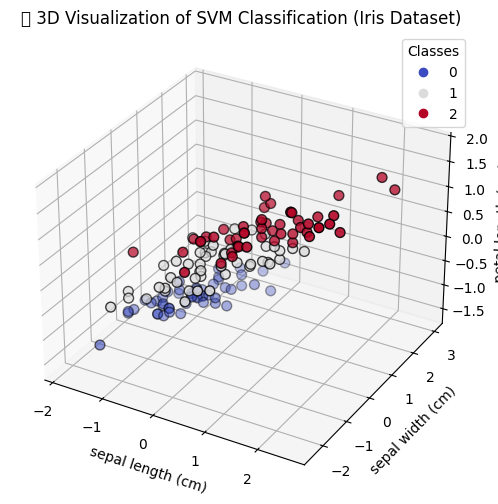

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier (using all 4 features)
svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(X_train_scaled, y_train)

# Evaluate accuracy
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"✅ Model accuracy on test data: {accuracy * 100:.2f}%")

# Select 3 features for visualization
x_index, y_index, z_index = 0, 1, 2  # sepal length, sepal width, petal length

# Combine train and test sets for visualization (optional)
X_vis = scaler.transform(X)
y_vis = y

# Create 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter the points
scatter = ax.scatter(X_vis[:, x_index], X_vis[:, y_index], X_vis[:, z_index],
                     c=y_vis, cmap=plt.cm.coolwarm, edgecolor='k', s=50)

# Set labels
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.set_zlabel(iris.feature_names[z_index])

# Title and legend
plt.title("🌸 3D Visualization of SVM Classification (Iris Dataset)")
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()

In [22]:
import joblib
joblib.dump(svm_model,"svm_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']